In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.utils import to_categorical


Using TensorFlow backend.


In [3]:
(image_train, label_train), (image_test, label_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 69s 0us/step


In [5]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(image_train)))
print("- Test-set:\t\t{}".format(len(image_test)))
class_names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
cls_train = to_categorical(label_train)
cls_test = to_categorical(label_test)

Size of:
- Training-set:		50000
- Test-set:		10000


In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 25

    # Create figure with sub-plots.
    fig, axes = plt.subplots(5, 5)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i][0]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

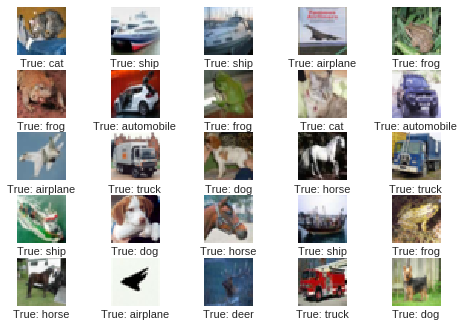

In [7]:
# Get the first images from the test-set.
images = image_test[0:25]

# Get the true classes for those images.
cls_true = label_test[0:25]
cls_true
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [0]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    return model

In [9]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:

checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [0]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [12]:

model_details = model.fit(image_train, cls_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (image_test, cls_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 310us/step - loss: 3.9678 - acc: 0.1767 - val_loss: 1.9280 - val_acc: 0.3048
Epoch 2/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.8873 - acc: 0.3026 - val_loss: 1.6346 - val_acc: 0.4242
Epoch 3/100
50000/50000 [==============================] - 13s 263us/step - loss: 1.6789 - acc: 0.3839 - val_loss: 1.4991 - val_acc: 0.4569
Epoch 4/100
50000/50000 [==============================] - 13s 262us/step - loss: 1.5542 - acc: 0.4309 - val_loss: 1.3771 - val_acc: 0.5098
Epoch 5/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.4598 - acc: 0.4725 - val_loss: 1.3241 - val_acc: 0.5258
Epoch 6/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.3868 - acc: 0.4979 - val_loss: 1.2731 - val_acc: 0.5400
Epoch 7/100
50000/50000 [==============================] - 13s 263us/step - loss: 1.3254 - acc: 0.5244 - val_l

In [14]:
scores = model.evaluate(image_test, cls_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.98%
